# DS Job Change Prediction Machine Learning Project

## Problem Statement
- A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which the company conducts. Many people sign up for their training. 

- Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


- This dataset is designed to understand the factors that lead a person to leave their current job for HR research too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

---

## Tasks
Hypothesis based EDA:

1. What is the job change percent of users who stayed in their previous company for less than or equal to 2 years?

2. Do people who work in start-ups (employees <= 100) have high job change percent?

3. Are more freshers working in startups with <= 100 employees?

4. Plot the bar charts for all the categorical variables in the data to understand the distributions of the same.

Create new features:

1. One-hot encode all the categorical variables.

2. Standardize the numerical variables

3. Build Models and compare the results:

4. Build a Logistic Regression using statsmodels library

5. Build a Logistic Regression using sklearn library

Compare the performance of the both.

# Import the dependancies

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DS_Job_Change_Data.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
# check for the missing values and dataframes
def inspection(dataframe): 
  import pandas as pd
  import seaborn as sns  
  print("Types of the variables we are working with:")
  print(dataframe.dtypes) # dtypes
  
  print("Total Samples with missing values:")
  
  print(df.isnull().any(axis=1).sum()) # null values
  
  print("Total Missing Values per Variable")
  print(df.isnull().sum())
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

Types of the variables we are working with:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object
Total Samples with missing values:
10203
Total Missing Values per Variable
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours     

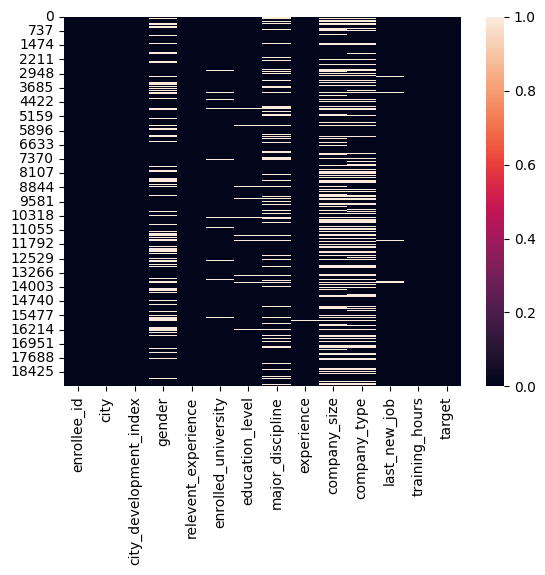

In [6]:
inspection(df)

- According to the information obtained, there are three key variables namely; object, float64 and int64. Moreover, there are quite a few missing datapoint particularly for gender, company size, company type, and major discipline. 

- This information will not be of any use therefor we get rid of these columns

In [9]:
def drop_columns_and_print(df, columns_to_drop):
    """
    Drops specified columns from the DataFrame and prints the remaining DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame from which to drop columns.
    columns_to_drop (list): List of column names to drop from the DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame with specified columns dropped.
    """
    # Drop the specified columns
    df_dropped = df.drop(columns=columns_to_drop)
    
    # Print the remaining DataFrame
    print(df_dropped)
    
    return df_dropped



In [12]:
df_dropped

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,<1,never,52,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0
